In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import json

import nibabel
import nilearn
import numpy as np
import sklearn
import pandas as pd

from nilearn import plotting

import rtcloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Prepare test samples
test_subject = 2
data_dir = "data"

dataset = nilearn.datasets.fetch_haxby(data_dir="datasets", subjects=[test_subject])
labels_test = pd.read_csv(dataset.session_target[0], sep=" ")
y_test_all = labels_test["labels"]
condition_mask_test = np.array(y_test_all.isin(["face", "house"]))

In [33]:
fmri_img_test = nilearn.image.index_img(dataset.func[0], condition_mask_test)
fmri_data_test = fmri_img_test.get_data()
y_test = y_test_all[condition_mask_test]
for sample in range(fmri_data_test.shape[-1]):
    sample_data = fmri_data_test[..., sample][..., np.newaxis]
    sample_img = nilearn.image.new_img_like(fmri_img_test, sample_data)
    nibabel.save(sample_img, "{}/subject-{}-sample-{:03}.nii.gz".format(data_dir, test_subject, sample))

In [ ]:
conf = {
    "name": "searchlight"
}
mask_img = nibabel.load(dataset.mask)
conf['experiment_data'] = {
    "models": sklearn.externals.joblib.load("models.pkl"),
    "mask_data": mask_img.get_data().astype(bool),
    "mask_affine": mask_img.affine,
}

client = rtcloud.Client(server_ip='34.237.207.176', conf=conf)
client.start()

In [ ]:
client.queue(input_dir=data_dir, tr=2500, loop=True)

Process Process-14:
  File "/usr/people/mcapota/.local/lib/python3.6/site-packages/pika/adapters/blocking_connection.py", line 1756, in start_consuming
    self.connection.process_data_events(time_limit=None)
Traceback (most recent call last):
  File "/usr/people/mcapota/.local/lib/python3.6/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/people/mcapota/.local/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/mcapota/Surse/rtcloud/rtcloud/client.py", line 166, in watch_helper
    channel.start_consuming()
  File "/usr/people/mcapota/.local/lib/python3.6/site-packages/pika/adapters/blocking_connection.py", line 707, in process_data_events
    self._flush_output(common_terminator)
  File "/usr/people/mcapota/.local/lib/python3.6/site-packages/pika/adapters/blocking_connection.py", line 474, in _flush_output
    result.reason_text)
pika.exceptions.ConnectionClosed: (

KeyboardInterrupt: 

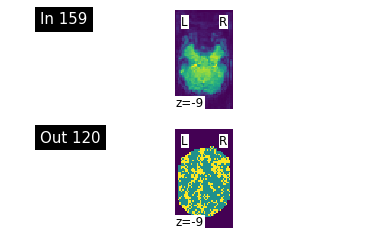

In [ ]:
client.watch()
client.display()